# Imports

In [45]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

# data partition
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import importlib
importlib.reload(f)



<module 'functionsML' from 'c:\\Users\\ricar\\Documents\\GitHub\\ProjetoML\\functionsML.py'>

**Import data sets**

In [94]:
train_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/train.csv")
test_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/test.csv")

In [62]:
test_db

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,VW,Tiguan,2017.000000,Manual,27575.000000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,2020.000000,Automatic,1980.000000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,2019.000000,Semi-Auto,8297.000000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,A Class,2019.000000,Manual,-50755.210230,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


### Data exploration

In [ ]:
train_db.head(15)

#typos in transmission and fuel
#engineSize with NaN
#mileage, mpg and previousOwners with irational values
#previousOwners with negative values
#hasDamage seems to always be 0

In [ ]:
train_db.describe(include='object')

In [ ]:
test_db.describe(include='object')

In [ ]:
train_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

In [ ]:
test_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

In [ ]:
train_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

In [ ]:
test_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

In [ ]:
f.missing_values_table(train_db)

In [ ]:
train_db[train_db["mpg"].isna()].head(10)

In [ ]:
train_db[train_db["tax"].isna()].head(10)

In [ ]:
train_db[train_db["hasDamage"].isna()].head(10)

In [ ]:
train_db[train_db["previousOwners"].isna()].head(10)

In [ ]:
train_db[train_db["paintQuality%"].isna()].head(10)

In [ ]:
train_db[train_db["transmission"].isna()].head(10)

In [ ]:
train_db[train_db["model"].isna()].head(10)

In [ ]:
train_db[train_db["Brand"].isna()].head(10)

In [ ]:
train_db[train_db["engineSize"].isna()].head(10)

In [ ]:
train_db[train_db["fuelType"].isna()].head(10)

In [ ]:
train_db[train_db["year"].isna()].head(10)

In [ ]:
train_db[train_db["mileage"].isna()].head(10)

In [ ]:
f.negative_values_table(train_db)

In [ ]:
train_db[train_db["tax"] < 0].head(10)

In [ ]:
train_db[train_db["tax"] < 0]["tax"].unique()[:10]

In [ ]:
train_db[train_db["mileage"] < 0].head(10)

In [ ]:
train_db[train_db["mileage"] < 0]["mileage"].unique()[:10]

In [ ]:
train_db[train_db["previousOwners"] < 0].head(10)

In [ ]:
train_db[train_db["previousOwners"] < 0]["previousOwners"].unique()[:10]

In [ ]:
train_db[train_db["engineSize"] < 0].head(10)

In [ ]:
train_db[train_db["engineSize"] < 0]["engineSize"].unique()[:10]

In [ ]:
train_db[train_db["mpg"] < 0].head(10)

In [ ]:
train_db[train_db["mpg"] < 0]["mpg"].unique()[:10]

In [ ]:
f.irrational_values_table(train_db)

**Unique Values**

In [90]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")

#typos in every categorical variable
#different letter casing in every categorical variable
#unrealistic negative values and irrational values in every numerical category


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

**Correlation Matrix**

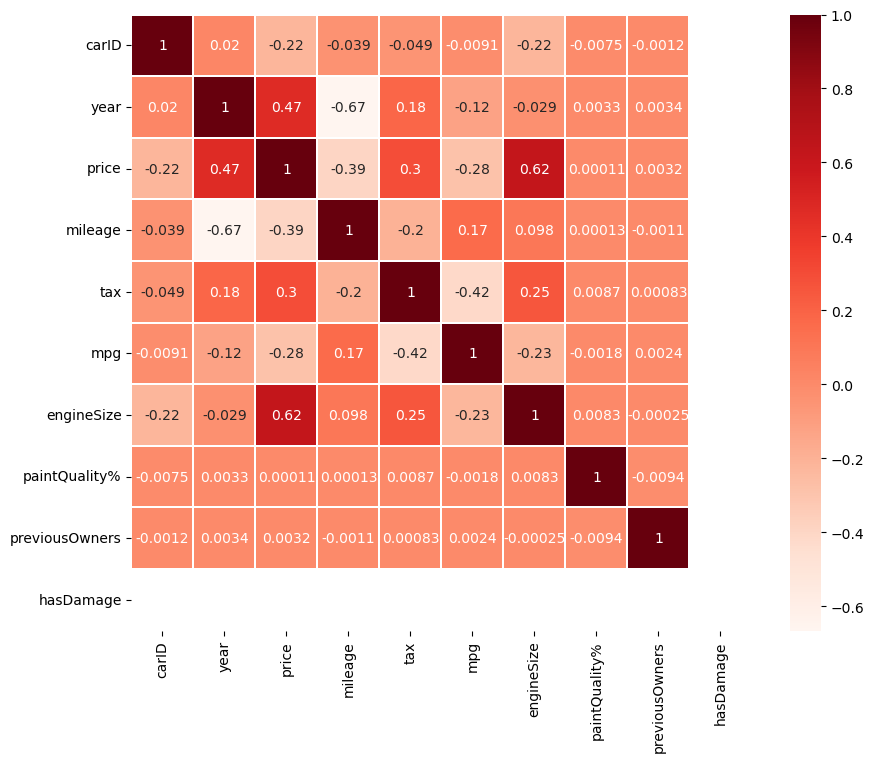

In [13]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

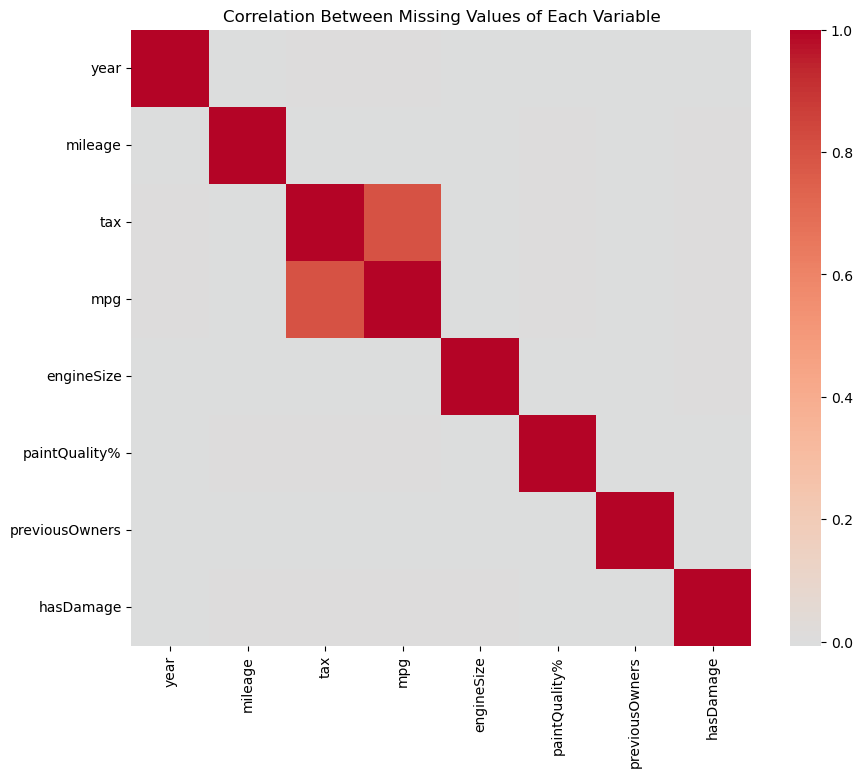

In [8]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

## Distributions & Value Counts

In [99]:
train_db["Brand"].value_counts()

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
OYOTA           2
SKOD            1
TOYOT           1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

In [100]:
train_db["model"].value_counts()

model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
M5               1
 gls class       1
Mokka            1
 6 Serie         1
 JETTA           1
Name: count, Length: 735, dtype: int64

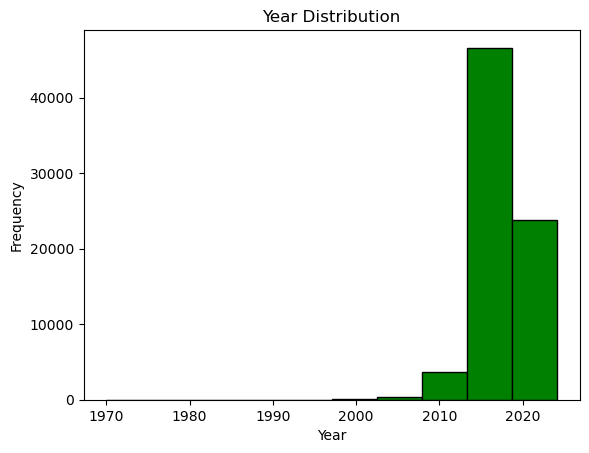

In [92]:
# Plot histogram for the "year" column
f.plot_histogram(train_db["year"], 
                 "Year",         # x-axis label
                 "Frequency",   # y-axis label
                 "Year Distribution")  # title of the plot

In [101]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
EMI-AUTO         7
 Manual          7
automati         6
utomati          6
 manual          6
AUTOMATI         6
emi-Aut          5
Other            5
semi-aut         4
manua            2
UTOMATIC         2
manual           1
nknow            1
Name: count, dtype: int64

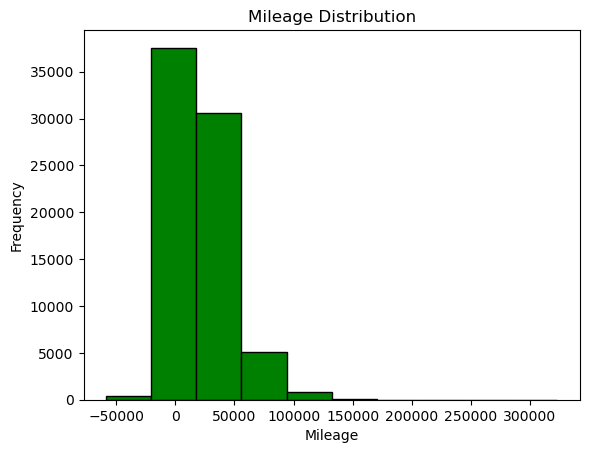

In [93]:
# Plot histogram for the "mileage" column
f.plot_histogram(train_db["mileage"], 
                 "Mileage",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mileage Distribution")  # title of the plot

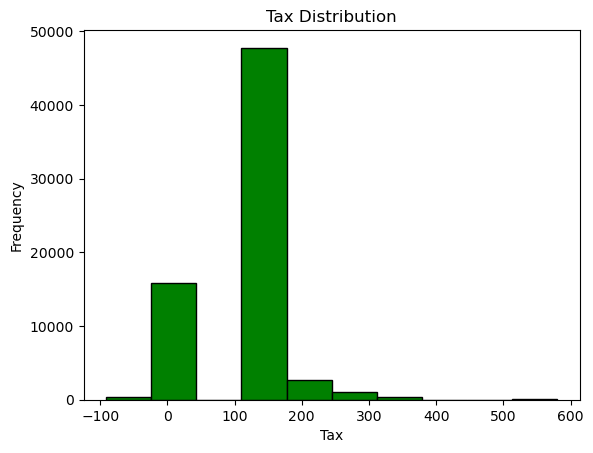

In [94]:
# Plot histogram for the "tax" column
f.plot_histogram(train_db["tax"], 
                 "Tax",         # x-axis label
                 "Frequency",   # y-axis label
                 "Tax Distribution")  # title of the ploty

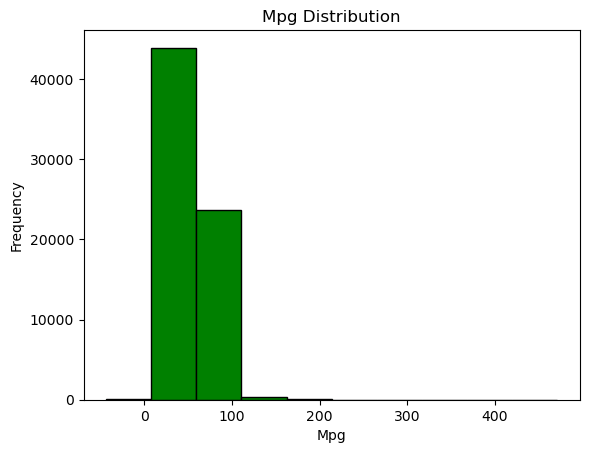

In [95]:
# Plot histogram for the "mpg" column
f.plot_histogram(train_db["mpg"], 
                 "Mpg",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mpg Distribution")  # title of the ploty

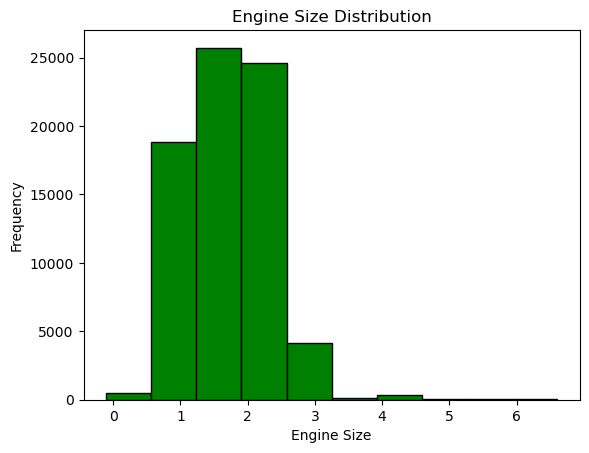

In [96]:
# Plot histogram for the "engineSize" column
f.plot_histogram(train_db["engineSize"], 
                 "Engine Size",         # x-axis label
                 "Frequency",   # y-axis label
                 "Engine Size Distribution")  # title of the ploty

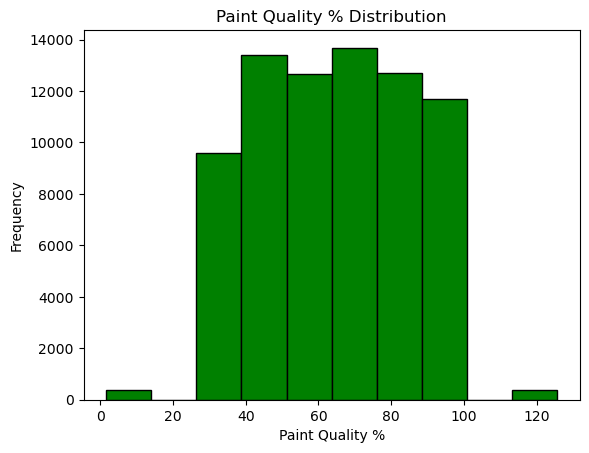

In [97]:
# Plot histogram for the "paintQuality%" column
f.plot_histogram(train_db["paintQuality%"], 
                 "Paint Quality %",         # x-axis label
                 "Frequency",   # y-axis label
                 "Paint Quality % Distribution")  # title of the ploty

## Fixing issues

In [95]:
# Drop irrelevant column
train_db = train_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = train_db.select_dtypes(include=["object"]).columns
train_db[text_cols] = train_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db.select_dtypes(include="object").columns:
    train_db = f.fix_typos(col, train_db)


In [96]:
# Rounding future Int values
train_db.loc[:, "year"] = train_db["year"].round()

# Removes every negative and irrational number from previousOwners
train_db.loc[(train_db['previousOwners'] < 0) | (train_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Rounds every irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan

# Remove every negative value out of the numeric columns
for col in train_db.select_dtypes(include="float64").columns:
    train_db = f.negative_to_nan_columns(col,train_db)

In [31]:
# Select all nominal columns
nominal_cols = train_db.select_dtypes(include='object').columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(nominal_cols):
    for col2 in nominal_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")


Cramér's V between Brand and model: 0.995
Cramér's V between Brand and transmission: 0.299
Cramér's V between Brand and fuelType: 0.278
Cramér's V between model and transmission: 0.363
Cramér's V between model and fuelType: 0.489
Cramér's V between transmission and fuelType: 0.199


In [6]:


num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Try single and multi-column combinations up to this size
max_combo_size = 4 

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.981
  U(Brand | model + fuelType) = 0.979
  U(Brand | model) = 0.977
  U(Brand | transmission + fuelType) = 0.133
  U(Brand | transmission) = 0.093
  U(Brand | fuelType) = 0.053

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType) = 0.562
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.520
  U(model | Brand) = 0.494
  U(model | transmission + fuelType) = 0.132
  U(model | transmission) = 0.071
  U(model | fuelType) = 0.070

For categorical column 'transmission', best predictors:
  U(transmission | Brand + model + fuelType) = 0.327
  U(transmission | model + fuelType) = 0.317
  U(transmission | Brand + model) = 0.292
  U(transmission | model) = 0.282
  U(transmission | Brand + fuelType) = 0.230
  U(transmission | Brand) = 0.189


In [ ]:
"""
from itertools import combinations
def correlation_ratio(categories, values):
    df = pd.DataFrame({'cat': categories, 'val': values}).dropna()
    if df.empty:
        return 0.0
    group_stats = df.groupby('cat')['val'].agg(['mean', 'size'])
    overall_mean = df['val'].mean()
    num = (group_stats['size'] * (group_stats['mean'] - overall_mean) ** 2).sum()
    den = ((df['val'] - overall_mean) ** 2).sum()
    return np.sqrt(num / den) if den > 0 else 0.0

# Separate numeric and categorical columns
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(exclude='number').columns

for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in itertools.combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in itertools.combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = correlation_ratio(combined, train_db[target]) ** 2


    # --- Mixed numeric + categorical pairs  ---
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = correlation_ratio(combined, df[target]) ** 2

    # --- Top 3 helpers ---
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")"""


NameError: name 'itertools' is not defined

### -----POR DAR CLEAN UP-----

In [97]:
# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["paintQuality%"] = train_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.

In [162]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69963 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           69963 non-null  int64  
 1   Brand           69963 non-null  object 
 2   model           69963 non-null  object 
 3   year            69963 non-null  Int64  
 4   price           69963 non-null  int64  
 5   transmission    69963 non-null  object 
 6   mileage         69963 non-null  float64
 7   fuelType        69963 non-null  object 
 8   tax             69963 non-null  float64
 9   mpg             69963 non-null  float64
 10  engineSize      69963 non-null  float64
 11  paintQuality%   69963 non-null  float64
 12  previousOwners  69963 non-null  Int64  
 13  hasDamage       69963 non-null  float64
dtypes: Int64(2), float64(6), int64(2), object(4)
memory usage: 8.1+ MB


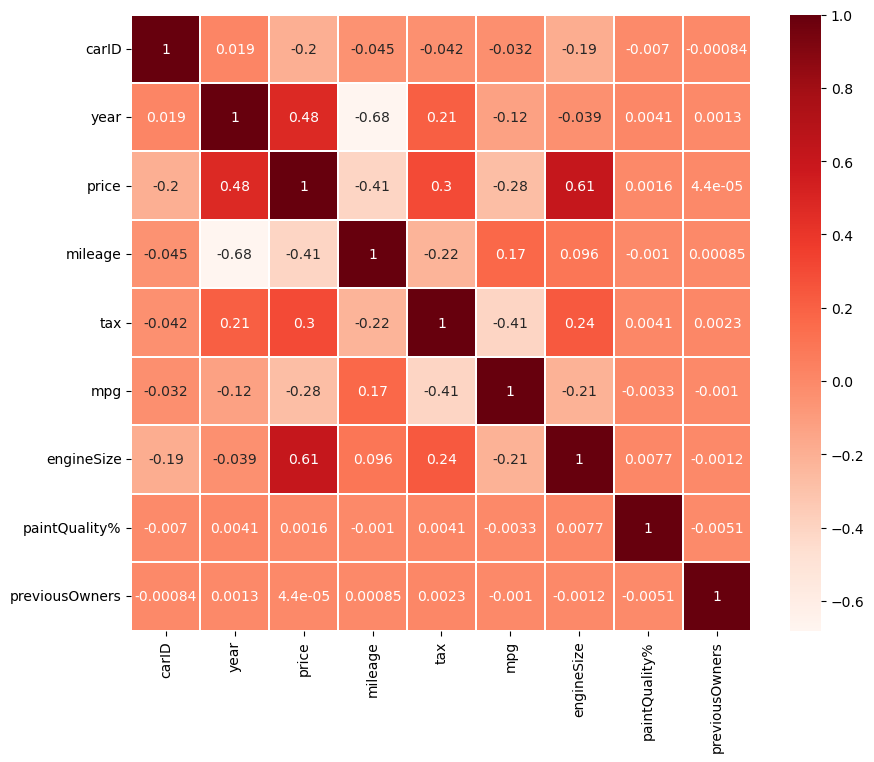

In [13]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

In [78]:
train_db[train_db['other'] != 0]


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,...,skoda,toyota,vw,manual,other,semi-auto,unknown,electric,hybrid,petrol
14530,40311,mercedes,slk,2015,12995,unknown,39000.0,diesel,150.0,56.5,...,0,0,0,0,1,0,0,0,0,0
19990,47325,skoda,scala,2019,15999,unknown,3500.0,petrol,145.0,47.1,...,1,0,0,0,1,0,0,0,0,1
27106,45395,mercedes,gla class,2016,18700,unknown,30895.0,electric,125.0,56.5,...,0,0,0,0,1,0,0,1,0,0
30199,63975,opel,mokka,2019,19995,unknown,1450.0,diesel,145.0,57.7,...,0,0,0,0,1,0,0,0,0,0
66908,34033,hyundai,tucson,2017,16995,unknown,25915.0,petrol,145.0,39.8,...,0,0,0,0,1,0,0,0,0,1


In [98]:
one_hot = pd.get_dummies(train_db["Brand"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot], axis=1)

train_db['transmission'] = train_db['transmission'].replace('other', 'unknown')

one_hot2 = pd.get_dummies(train_db["transmission"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot2], axis=1)

train_db["fuelType"] = train_db["fuelType"].replace('other', 'electric')

one_hot3 = pd.get_dummies(train_db["fuelType"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot3], axis=1)



#train_db["Brand_count"].value_counts()
#for col in ["ford", "mercedes", "vw", "opel", "bmw","toyota","skoda","hyundai"]:
for col in one_hot.columns:
    print(train_db[col].value_counts())

bmw
0    68419
1     7544
Name: count, dtype: int64
ford
0    59542
1    16421
Name: count, dtype: int64
hyundai
0    72567
1     3396
Name: count, dtype: int64
mercedes
0    64059
1    11904
Name: count, dtype: int64
opel
0    66424
1     9539
Name: count, dtype: int64
skoda
0    71580
1     4383
Name: count, dtype: int64
toyota
0    71250
1     4713
Name: count, dtype: int64
vw
0    65362
1    10601
Name: count, dtype: int64


In [99]:
for col in ["manual", "semi-auto", "unknown","hybrid"]:
    print(train_db[col].value_counts())

manual
1    43144
0    32819
Name: count, dtype: int64
semi-auto
0    59092
1    16871
Name: count, dtype: int64
unknown
0    75222
1      741
Name: count, dtype: int64
hybrid
0    73738
1     2225
Name: count, dtype: int64


In [100]:
# Compute mean Price for each model
target_mean = train_db.groupby('model')['price'].mean()

# Map the mean back to a new column
train_db['model_encoded'] = train_db['model'].map(target_mean)

print(train_db[['model', 'price', 'model_encoded']].head(100))

        model  price  model_encoded
0        golf  22290   16743.335333
1       yaris  13790   10521.831359
2          q2  24990   23265.943878
3      fiesta  12500   10233.033333
4    2 series  22995   19680.701510
..        ...    ...            ...
95        i20   9995    8736.942598
96     fiesta   8930   10233.033333
97      focus   9699   14015.292813
98  gls class  67600   46969.964286
99      b-max   9498    8354.677419

[100 rows x 3 columns]


In [101]:
X = train_db.drop(columns=["price","carID"])
y = train_db["price"]
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

In [102]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

In [103]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,bmw,ford,hyundai,...,skoda,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,model_encoded
55979,0.851852,0.105855,0.034483,0.140941,0.303030,0.680645,1.00,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125282
59635,0.851852,0.040864,0.051724,0.131360,0.303030,0.575806,0.50,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.120337
74650,0.870370,0.056115,0.000000,0.155844,0.272727,0.285484,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.191323
1593,0.888889,0.035084,0.250000,0.134341,0.151515,0.333871,1.00,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.098442
71303,0.851852,0.109025,0.034483,0.144347,0.242424,0.374194,1.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.089362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21246,0.851852,0.134075,0.215517,0.120290,0.303030,0.382258,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.213176
45899,0.870370,0.015972,0.344828,0.087503,0.212121,0.366129,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.085704
42618,0.907407,0.017963,0.250000,0.090270,0.212121,0.422581,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.067898
43573,0.907407,0.025152,0.250000,0.111135,0.196970,0.777419,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.185444


In [104]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.538)
model is IMPORTANT for prediction (η = 0.760)
transmission is IMPORTANT for prediction (η = 0.544)
fuelType is IMPORTANT for prediction (η = 0.210)


In [105]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.814868


In [106]:
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 20)

train_db_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [107]:
X_train_num_scaled.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'bmw', 'ford', 'hyundai', 'mercedes', 'opel', 'skoda',
       'toyota', 'vw', 'manual', 'semi-auto', 'unknown', 'electric', 'hybrid',
       'petrol', 'model_encoded'],
      dtype='object')

In [86]:
rfe.ranking_

array([1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year               True
mileage            True
tax                True
mpg                True
engineSize         True
paintQuality%     False
previousOwners    False
bmw                True
ford               True
hyundai            True
mercedes           True
opel               True
skoda              True
toyota             True
vw                 True
manual             True
semi-auto          True
unknown            True
electric           True
hybrid             True
petrol             True
model_encoded      True
dtype: bool

In [109]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 22 variables and eliminated the other 0 variables


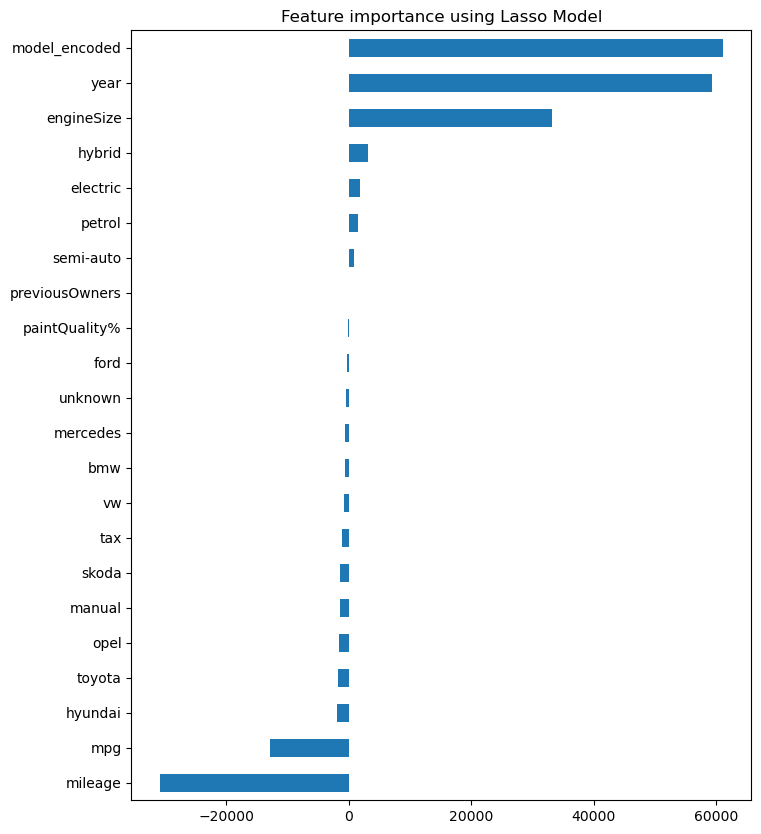

In [65]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |---|
| year | Keep? | Keep | Keep | Include in the model |
| engineSize | Keep | Keep |Keep| Include in the model |
| tax | Keep?| Keep | Discard | Discard |
| previousOwners | Keep? | Discard | Discard | Discard |
| paintQuality% | Keep? | Discard | Discard | Discard |
| mpg | Keep? | Keep | Keep? | Try with and without |
| mileage | Keep | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>



In [110]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

X_val_num_scaled = X_val_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

In [111]:
# 3. Fit model
model = LinearRegression()
model.fit(X_train_num_scaled, y_train)

# 4. Predict
y_pred = model.predict(X_val_num_scaled)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

R²: 0.815
MAE: 2617.12
RMSE: 4195.92


In [112]:
# Drop irrelevant column
test_db = test_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()

# Remove negative/irrational previousOwners
test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan

# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")

# Fill categorical columns using the same functions as training
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model"])
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
test_db = f.fill_NaN_with_mixed(test_db, "year", "model", "mileage")
test_db = f.fill_NaN_with_mixed(test_db, "mileage", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "tax", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "engineSize", "model", "tax")

# Fill numeric columns with median
test_db["paintQuality%"] = test_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')

for col in numeric_cols:
    # Convert to float to safely handle NaNs and group means
    test_db[col] = test_db[col].astype(float)
    
    # Compute model mean
    category_means = test_db.groupby("model")[col].transform('mean')
    
    # Fill NaNs with category mean
    test_db[col] = test_db[col].fillna(category_means)
    
    # Fill any remaining NaNs with global mean
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    
    # Optional: convert back to integer if column was originally integer
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")



        
# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)


# Create mapping dictionary from train_df
mapping = train_db.set_index("model")["model_encoded"].to_dict()

# Compute global mean in case test has unseen models
global_mean = train_db["model_encoded"].mean()

# Map test_df model to encoded value; unseen models get global_mean
test_db["model_encoded"] = test_db["model"].map(mapping).fillna(global_mean)

# Prepare features (exclude price and ID if present)
X_test = test_db.drop(columns=["carID"], errors='ignore')  # ignore if price not in test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)

# Scale using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)

X_test_num_scaled = X_test_num_scaled.drop(columns=[ 'previousOwners', "paintQuality%"])

c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.

In [113]:
y_test_pred = model.predict(X_test_num_scaled)

# Add predictions to the test DataFrame
test_db['price'] = y_test_pred

# Create a new DataFrame with only carID and predicted price
submission = test_db[['carID', 'price']].copy()

# Save to CSV
submission.to_csv("predicted_prices.csv", index=False)

# Preview
print(test_db[['carID']].head())

    carID
0   89856
1  106581
2   80886
3  100174
4   81376


In [157]:

X_test_num_scaled.isna().sum()

year             1
mileage          1
tax              0
mpg              0
engineSize       0
paintQuality%    0
bmw              0
hyundai          0
mercedes         0
opel             0
skoda            0
toyota           0
vw               0
manual           0
semi-auto        0
unknown          0
electric         0
hybrid           0
petrol           0
model_encoded    0
dtype: int64

In [27]:
test_db

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,...,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,model_encoded,price
0,89856,hyundai,i30,2023.0,automatic,30700.0,petrol,205.0,41.5,1.6,...,0,0,0,0,0,0,0,1,11999.833766,19686.737893
1,106581,vw,tiguan,2017.0,semi-auto,85454.6,petrol,150.0,38.2,2.0,...,0,1,0,1,0,0,0,1,21626.568995,18086.987297
2,80886,bmw,2 series,2016.0,automatic,36792.0,petrol,125.0,51.4,1.5,...,0,0,0,0,0,0,0,1,19677.507177,16756.634422
3,100174,opel,grandland x,2019.0,manual,5533.0,petrol,145.0,44.1,1.2,...,0,0,1,0,0,0,0,1,17201.577657,18078.571573
4,81376,bmw,1 series,2019.0,semi-auto,9058.0,diesel,150.0,51.4,2.0,...,0,0,0,1,0,0,0,0,15797.096154,21790.143199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,vw,tiguan,2017.0,manual,27575.0,petrol,145.0,46.3,1.4,...,0,1,1,0,0,0,0,1,21626.568995,18157.067564
32563,81363,bmw,ix20,2020.0,automatic,1980.0,petrol,145.0,34.0,2.0,...,0,0,0,0,0,0,0,1,20160.241379,27807.203844
32564,76833,audi,sq5,2019.0,semi-auto,8297.0,diesel,145.0,38.2,2.0,...,0,0,0,1,0,0,0,0,30399.762153,32482.299098
32565,91768,mercedes,a class,2019.0,manual,1000.0,petrol,145.0,28.5,1.3,...,0,0,1,0,0,0,0,1,20006.855081,21823.623079


In [70]:
test_db2 = pd.read_csv("C:/Users/ricar/Desktop/cars4you/test.csv")

In [71]:
df1=test_db
df2=test_db2

# Keep only columns that exist in both DataFrames
# Consider only the columns present in both DataFrames
unique_carIDs = ~df2['carID'].isin(df1['carID'])

# Filter df2 to only those rows
only_in_df2 = df2[unique_carIDs]


In [72]:
import pandas as pd

# Show all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# Get carIDs that are in df2 but not in df1
unique_carIDs = ~df2['carID'].isin(df1['carID'])

# Filter df2 to only those rows
only_in_df2 = df2[unique_carIDs]

# Print the entire dataframe
print(only_in_df2)


Empty DataFrame
Columns: [carID, Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, paintQuality%, previousOwners, hasDamage]
Index: []


In [47]:
# Drop irrelevant column
test_db = test_db.drop(columns="hasDamage")
print(f"[DEBUG] After dropping 'hasDamage', rows: {len(test_db)}")

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)
print(f"[DEBUG] After lowercasing text columns, rows: {len(test_db)}")

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)
    print(f"[DEBUG] After fix_typos on {col}, rows: {len(test_db)}")

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()
print(f"[DEBUG] After rounding 'year', rows: {len(test_db)}")

# Remove negative/irrational previousOwners
test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan
print(f"[DEBUG] After removing negative/irrational 'previousOwners', rows: {len(test_db)}")

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)
    print(f"[DEBUG] After rounding '{col}' to 1 decimal, rows: {len(test_db)}")

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan
print(f"[DEBUG] After removing 'paintQuality%' > 100, rows: {len(test_db)}")

# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)
    print(f"[DEBUG] After negative_to_nan_columns on '{col}', rows: {len(test_db)}")

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
print(f"[DEBUG] After converting 'previousOwners' to Int64, rows: {len(test_db)}")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")
print(f"[DEBUG] After converting 'year' to Int64, rows: {len(test_db)}")

# Fill categorical columns using the same functions as training
for target, helpers in [
    ("Brand", ["model","transmission","fuelType"]),
    ("Brand", ["model","transmission"]),
    ("model", ["Brand","transmission","fuelType"]),
    ("model", ["Brand","transmission"]),
    ("mpg", ["model","fuelType"]),
    ("mpg", ["model"])
]:
    test_db = f.fill_NaN_with_categorical(test_db, target, helpers)
    print(f"[DEBUG] After fill_NaN_with_categorical '{target}' with {helpers}, rows: {len(test_db)}")

# Fill transmission and fuelType with mode
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(f"[DEBUG] After filling 'transmission' with mode, rows: {len(test_db)}")
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(f"[DEBUG] After filling 'fuelType' with mode, rows: {len(test_db)}")

# Fill numeric columns with mixed helper approach
for target, cat_col, num_col in [
    ("year", "model", "mileage"),
    ("mileage", "model", "year"),
    ("tax", "model", "year"),
    ("engineSize", "model", "tax")
]:
    test_db = f.fill_NaN_with_mixed(test_db, target, cat_col, num_col)
    print(f"[DEBUG] After fill_NaN_with_mixed '{target}' using '{cat_col}' & '{num_col}', rows: {len(test_db)}")

# Fill numeric columns with median
test_db["paintQuality%"] = test_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
print(f"[DEBUG] After filling 'paintQuality%' with median, rows: {len(test_db)}")
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")
print(f"[DEBUG] After filling 'previousOwners' with median, rows: {len(test_db)}")

# Fill numeric columns by model
numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')
for col in numeric_cols:
    test_db[col] = test_db[col].astype(float)
    print(f"[DEBUG] After converting '{col}' to float, rows: {len(test_db)}")
    
    category_means = test_db.groupby("model")[col].transform('mean')
    test_db[col] = test_db[col].fillna(category_means)
    print(f"[DEBUG] After filling NaNs in '{col}' with model mean, rows: {len(test_db)}")
    
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    print(f"[DEBUG] After filling remaining NaNs in '{col}' with global mean, rows: {len(test_db)}")
    
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")
        print(f"[DEBUG] After converting '{col}' back to Int64, rows: {len(test_db)}")

# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)
print(f"[DEBUG] After one-hot encoding 'Brand', rows: {len(test_db)}")

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)
print(f"[DEBUG] After one-hot encoding 'transmission', rows: {len(test_db)}")

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)
print(f"[DEBUG] After one-hot encoding 'fuelType', rows: {len(test_db)}")

# Map model to encoded value
mapping = train_db.set_index("model")["model_encoded"].to_dict()
global_mean = train_db["model_encoded"].mean()
test_db["model_encoded"] = test_db["model"].map(mapping).fillna(global_mean)
print(f"[DEBUG] After mapping 'model' to 'model_encoded', rows: {len(test_db)}")

# Prepare features
X_test = test_db.drop(columns=["carID"], errors='ignore')
print(f"[DEBUG] After dropping 'carID', rows: {len(X_test)}")
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)
print(f"[DEBUG] After selecting numeric columns, rows: {len(X_test_num)}")

# Scale using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)
print(f"[DEBUG] After scaling numeric columns, rows: {len(X_test_num_scaled)}")

X_test_num_scaled = X_test_num_scaled.drop(columns=['ford', 'previousOwners', "paintQuality%"])
print(f"[DEBUG] After dropping 'ford', 'previousOwners', 'paintQuality%', rows: {len(X_test_num_scaled)}")


[DEBUG] After dropping 'hasDamage', rows: 32567
[DEBUG] After lowercasing text columns, rows: 32567
[DEBUG] After fix_typos on Brand, rows: 32567
[DEBUG] After fix_typos on model, rows: 32567
[DEBUG] After fix_typos on transmission, rows: 32567
[DEBUG] After fix_typos on fuelType, rows: 32567
[DEBUG] After rounding 'year', rows: 32567
[DEBUG] After removing negative/irrational 'previousOwners', rows: 32567
[DEBUG] After rounding 'year' to 1 decimal, rows: 32567
[DEBUG] After rounding 'mileage' to 1 decimal, rows: 32567
[DEBUG] After rounding 'tax' to 1 decimal, rows: 32567
[DEBUG] After rounding 'mpg' to 1 decimal, rows: 32567
[DEBUG] After rounding 'engineSize' to 1 decimal, rows: 32567
[DEBUG] After rounding 'paintQuality%' to 1 decimal, rows: 32567
[DEBUG] After rounding 'previousOwners' to 1 decimal, rows: 32567
[DEBUG] After removing 'paintQuality%' > 100, rows: 32567
[DEBUG] After negative_to_nan_columns on 'year', rows: 32567
[DEBUG] After negative_to_nan_columns on 'mileage', r

c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column


[DEBUG] After fill_NaN_with_categorical 'Brand' with ['model', 'transmission', 'fuelType'], rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.

[DEBUG] After fill_NaN_with_categorical 'Brand' with ['model', 'transmission'], rows: 32567
[DEBUG] After fill_NaN_with_categorical 'model' with ['Brand', 'transmission', 'fuelType'], rows: 32567
[DEBUG] After fill_NaN_with_categorical 'model' with ['Brand', 'transmission'], rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column
c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Fill NaN values in target_col using a combination of one categorical column


[DEBUG] After fill_NaN_with_categorical 'mpg' with ['model', 'fuelType'], rows: 32567
[DEBUG] After fill_NaN_with_categorical 'mpg' with ['model'], rows: 32567
[DEBUG] After filling 'transmission' with mode, rows: 32567
[DEBUG] After filling 'fuelType' with mode, rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:84: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  def fill_group_cat(group, target_col):


[DEBUG] After fill_NaN_with_mixed 'year' using 'model' & 'mileage', rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:84: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  def fill_group_cat(group, target_col):


[DEBUG] After fill_NaN_with_mixed 'mileage' using 'model' & 'year', rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:84: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  def fill_group_cat(group, target_col):


[DEBUG] After fill_NaN_with_mixed 'tax' using 'model' & 'year', rows: 32567
[DEBUG] After fill_NaN_with_mixed 'engineSize' using 'model' & 'tax', rows: 32567
[DEBUG] After filling 'paintQuality%' with median, rows: 32567
[DEBUG] After filling 'previousOwners' with median, rows: 32567
[DEBUG] After converting 'year' to float, rows: 32567
[DEBUG] After filling NaNs in 'year' with model mean, rows: 32567
[DEBUG] After filling remaining NaNs in 'year' with global mean, rows: 32567
[DEBUG] After converting 'mileage' to float, rows: 32567
[DEBUG] After filling NaNs in 'mileage' with model mean, rows: 32567
[DEBUG] After filling remaining NaNs in 'mileage' with global mean, rows: 32567
[DEBUG] After converting 'tax' to float, rows: 32567
[DEBUG] After filling NaNs in 'tax' with model mean, rows: 32567
[DEBUG] After filling remaining NaNs in 'tax' with global mean, rows: 32567
[DEBUG] After converting 'mpg' to float, rows: 32567
[DEBUG] After filling NaNs in 'mpg' with model mean, rows: 32567


c:\Users\ricar\Documents\GitHub\ProjetoML\functionsML.py:84: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  def fill_group_cat(group, target_col):


In [38]:
numeric_cols

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners'],
      dtype='object')

In [39]:
only_in_df2[only_in_df2.isna().any(axis=1)]


,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
26,107877,VW,Golf,2016.0,NaN,21701.0,Diesel,20.0,67.3,2.0,98.000000,4.0,0.0
101,104166,VW,Tiguan,2017.0,NaN,25265.0,Diesel,145.0,49.6,2.0,47.000000,2.0,0.0
112,94550,Mercedes,SL CLASS,2017.0,Semi-Auto,16247.0,NaN,145.0,47.9,2.0,59.000000,3.0,0.0
125,89011,Ford,Focus,2017.0,Manual,18563.0,NaN,150.0,60.1,1.0,38.000000,2.0,0.0
132,92903,Mercedes,E Class,2011.0,Automatic,138000.0,NaN,150.0,53.3,2.1,NaN,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32492,78585,Audi,A4,2016.0,Semi-Auto,26808.0,NaN,20.0,67.3,2.0,93.000000,2.0,0.0
32508,87367,Ford,Fiesta,2018.0,NaN,21666.0,Petrol,150.0,NaN,1.0,36.000000,3.0,0.0
32510,107524,VW,Golf,2017.0,Manual,29705.0,NaN,145.0,72.4,1.4,54.000000,2.0,0.0
32523,94404,Mercedes,CLS Class,2015.0,NaN,39858.0,Diesel,125.0,56.5,2.1,53.000000,0.0,0.0
